In [2]:
%pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 9.9 MB/s eta 0:00:00


In [4]:
%pip install langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.1/467.1 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.1 which is incompatible.


In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [3]:
load_dotenv()

llm = ChatOpenAI()

In [4]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [5]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [6]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [7]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

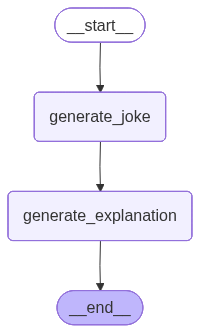

In [8]:
workflow

In [9]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!",
 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}

In [10]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!", 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-6272-6bf7-8002-ad426475277b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-27T08:52:04.780517+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-4f53-63c3-8001-5ab9cf20d

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!", 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-6272-6bf7-8002-ad426475277b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-27T08:52:04.780517+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-4f53-63c3-8001-5ab9cf20

In [12]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': "Why did the spaghetti break up with the linguine? \n\nBecause it couldn't handle the pressure of their twisted relationship!",
 'explanation': 'This joke plays on the literal idea of pasta breaking apart when under pressure, such as when boiling in water. In this context, the spaghetti broke up with the linguine because it couldn\'t handle the pressure of their relationship, which was described as being "twisted." This is a play on words, as twisted can refer to the shape of the pasta but also suggests a problematic or complicated relationship. Overall, the joke combines a pun with a bit of wordplay to create a humorous situation about pasta breaking up.'}

In [13]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!", 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-6272-6bf7-8002-ad426475277b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-27T08:52:04.780517+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-4f53-63c3-8001-5ab9cf20d

In [14]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!", 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-6272-6bf7-8002-ad426475277b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-27T08:52:04.780517+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-4f53-63c3-8001-5ab9cf20

### Time Travel

In [17]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0b3123-6272-6bf7-8002-ad426475277b"}})

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!", 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0b3123-6272-6bf7-8002-ad426475277b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-27T08:52:04.780517+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-4f53-63c3-8001-5ab9cf20d264'}}, tasks=(), int

In [19]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0b3123-6272-6bf7-8002-ad426475277b"}})

{'topic': 'pizza',
 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!",
 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}

In [18]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!", 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-6272-6bf7-8002-ad426475277b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-27T08:52:04.780517+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-4f53-63c3-8001-5ab9cf20

#### Updating State

In [20]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0b3123-6272-6bf7-8002-ad426475277b", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b3131-fdee-6632-8003-418eb9b6a9c8'}}

In [21]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!", 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3131-fdee-6632-8003-418eb9b6a9c8'}}, metadata={'source': 'update', 'step': 3, 'parents': {}}, created_at='2025-10-27T08:58:36.893732+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-6272-6bf7-8002-ad426

In [22]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0b3123-6272-6bf7-8002-ad426475277b"}})

{'topic': 'pizza',
 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!",
 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}

In [23]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't hold it all together!", 'explanation': 'This joke plays on the idea of a slice of pizza needing therapy because it couldn\'t handle all the toppings on it. It\'s a play on the phrase "can\'t hold it all together," implying that the slice of pizza is struggling to maintain its shape and composure due to having too many toppings. The humor comes from the absurdity of a slice of pizza seeking therapy for a problem that humans might face, adding a lighthearted and humorous twist to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3131-fdee-6632-8003-418eb9b6a9c8'}}, metadata={'source': 'update', 'step': 3, 'parents': {}}, created_at='2025-10-27T08:58:36.893732+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3123-6272-6bf7-8002-ad426

### Fault Tolerance

In [24]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [25]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [27]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [28]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

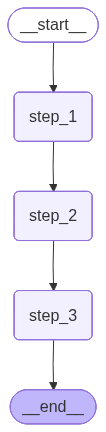

In [29]:
graph

In [30]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [33]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


KeyboardInterrupt: 

In [34]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3136-a2ce-6102-8001-1e764ab1adaf'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-27T09:00:41.556177+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3136-a2c9-60a8-8000-08e205b979d8'}}, tasks=(PregelTask(id='8d6b8eca-e88d-194c-6792-1cfbcd6d3f15', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b3136-a2c9-60a8-8000-08e205b979d8'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-10-27T09:00:41.554120+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'ch